
Open In Colab
Algerian Forest Fires

Data set Available at: link text

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the

Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
122 instances for each region.

The period from June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (class)

The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws : Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

Data Preprocessing

In this particular step, we will perform Exploratory Data Analysis (EDA) to extract insights from the dataset to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn.
It is always a good practice to understand the data first and try to gather as many insights from it.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

In [10]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header= 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [11]:
#Exploratory Data Analysis
#Creating a copy of original dataset
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [12]:
df.tail()#used to show the end of data set

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


All the features are of object datatype, whcih i need to convert it into integer in order to perform regression analysis

In [14]:
df.shape

(246, 14)

In [15]:
df.isnull().sum()
#no idea

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [16]:
df[df.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## Here the Missing values at 122th index seprate the data set in two regions.

1 : **Bejaia Region Dataset**

2 : **Sidi-Bel Abbes Region Dataset**

Therefore, we can make a new column based on the Region
👇🏻code for the seperation


In [17]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [18]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [19]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
237,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
239,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
240,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [20]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [21]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [22]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [23]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [24]:
#remove 122th column
df1 = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [25]:
#no dublicate data in set
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [26]:
df1.shape

(243, 15)

In [27]:
df1[df1.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [28]:
# List out column names to check
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

# Here in some of the columns are misspaced so need to remove the space to make the column name simple

In [29]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## ** **bold text**Changing the data types into the required data types for the respective features for the analysis**

In [30]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [31]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)#no idea

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [33]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [34]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [35]:
df1["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

## our dependent feature(Classes) containig only two categories but due to misspace it is showing multiple category so need to change the spaceing in order to make two category

In [36]:
df1.Classes = df1.Classes.str.strip()

In [37]:
df1["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [38]:
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [39]:
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [40]:
df1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


<Axes: >

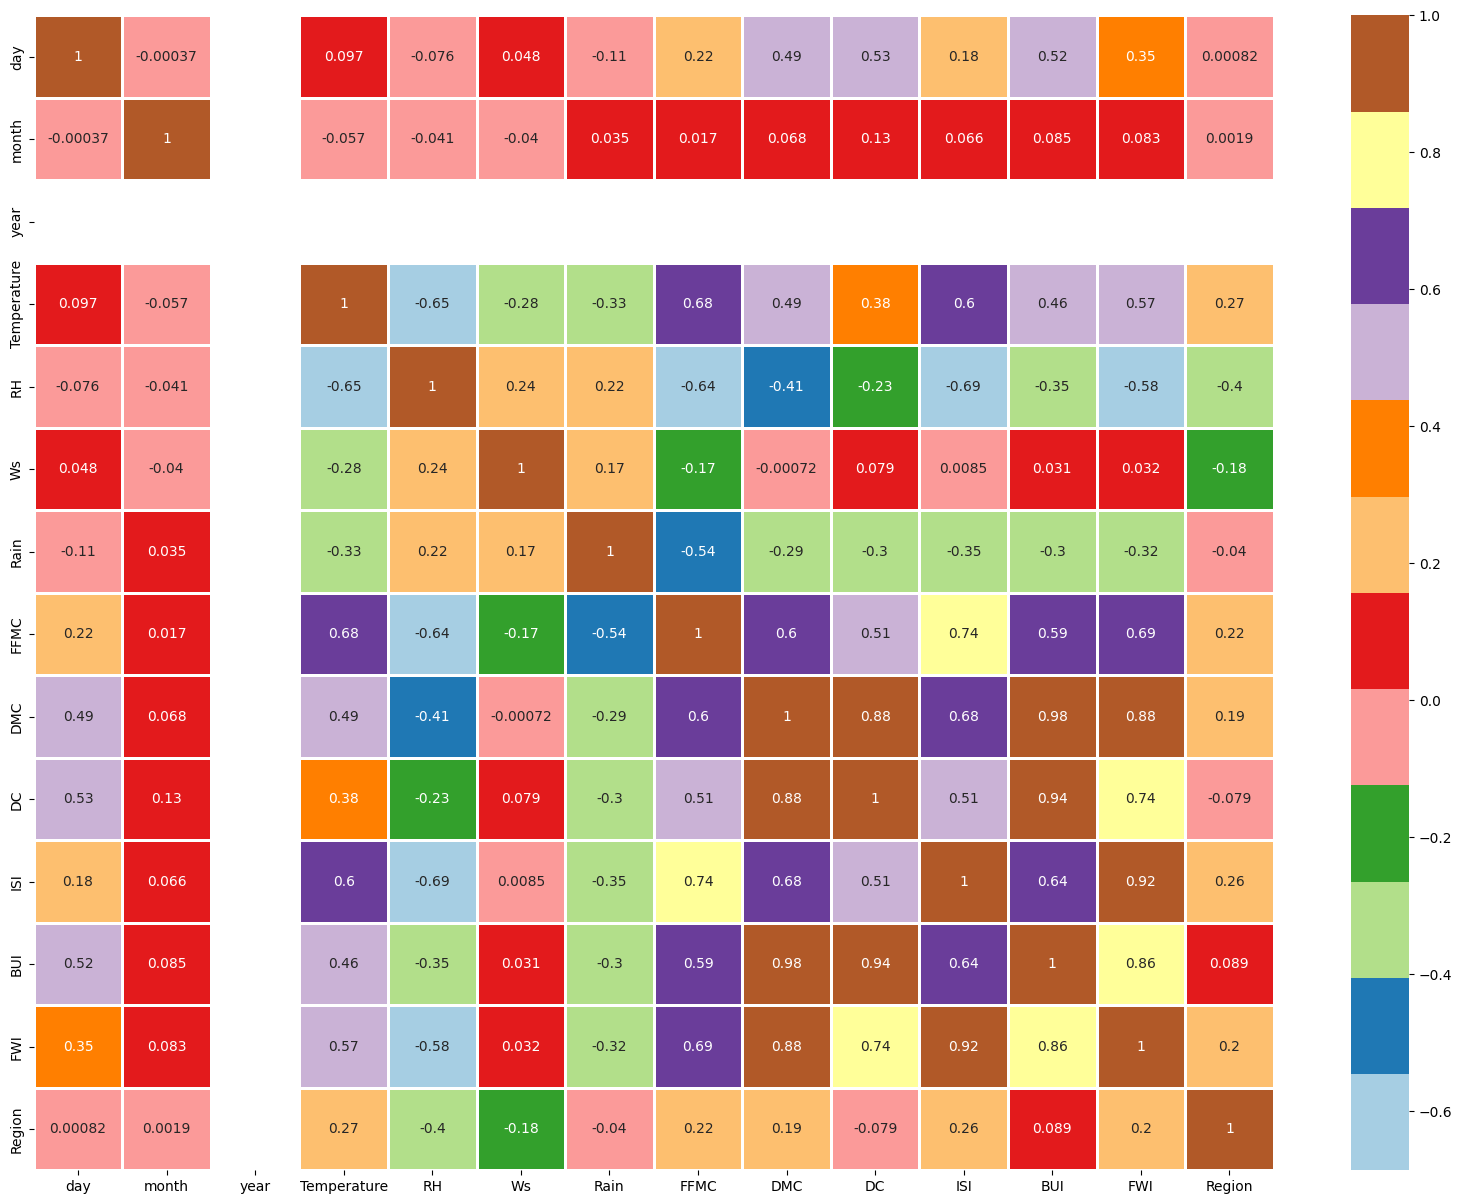

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True,
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [42]:
df1.shape

(243, 15)

In [43]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [44]:
# Check counts
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

<Axes: >

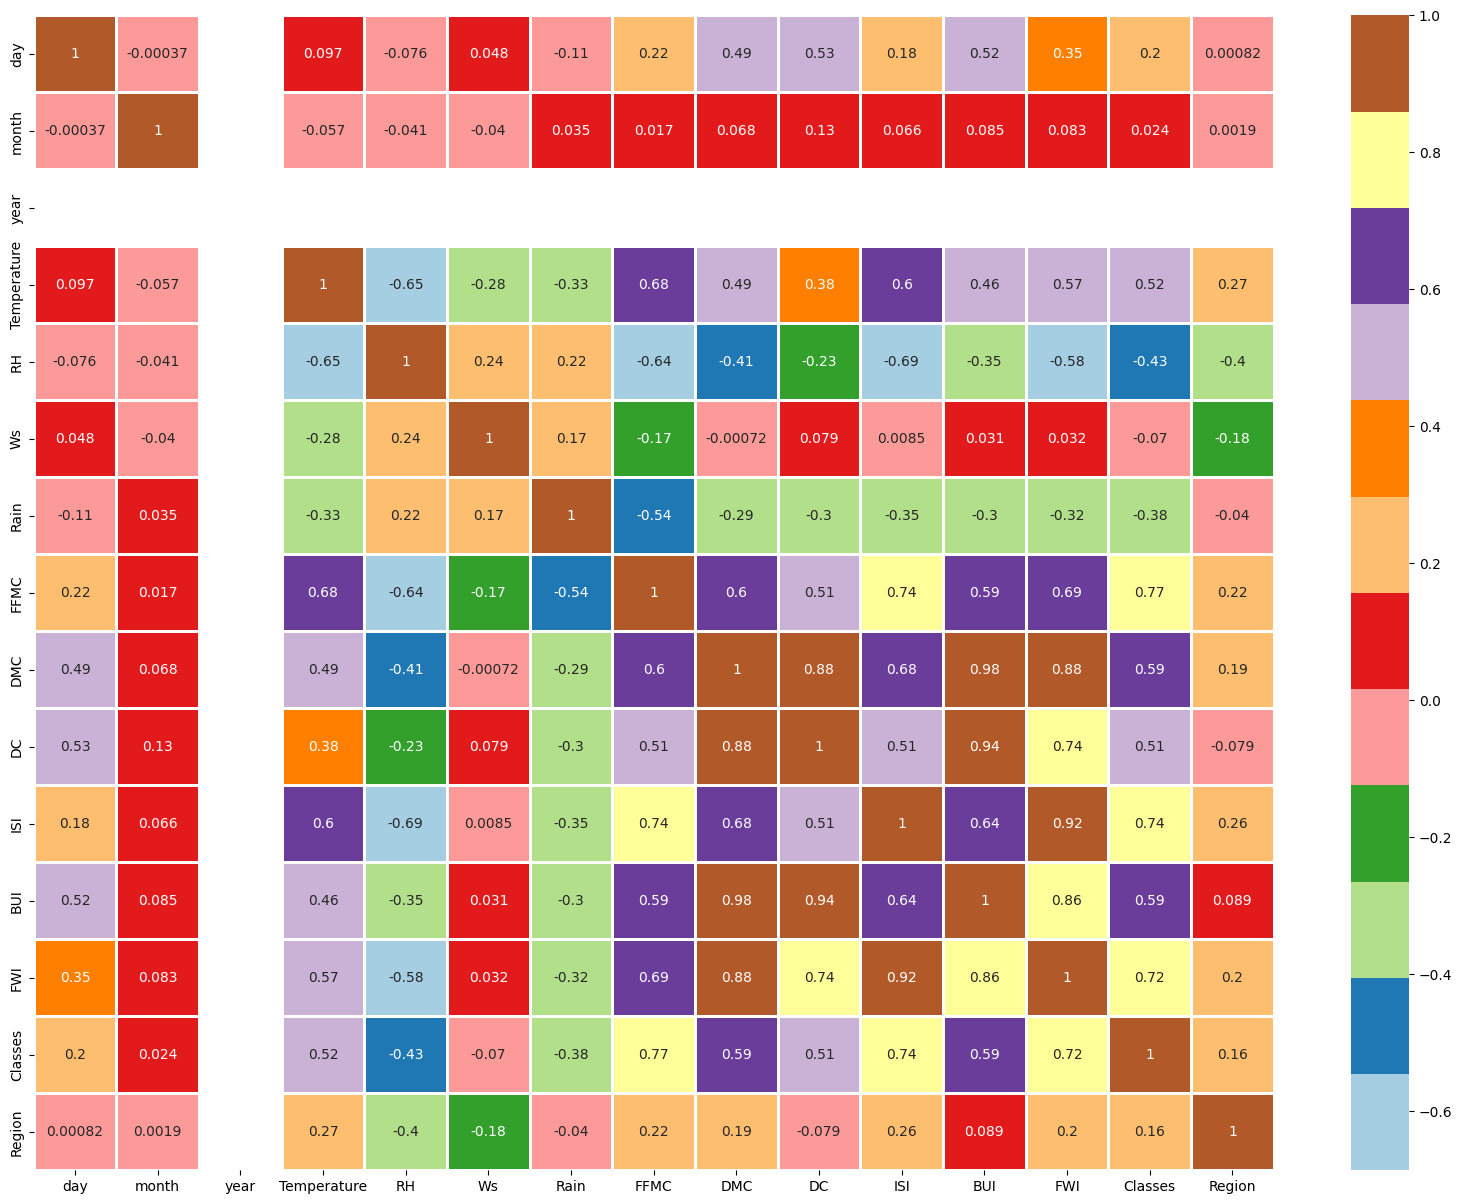

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [46]:
df1.to_csv('Algerian_forest_fire_cleaned-data.csv', index=False)

data is exported...

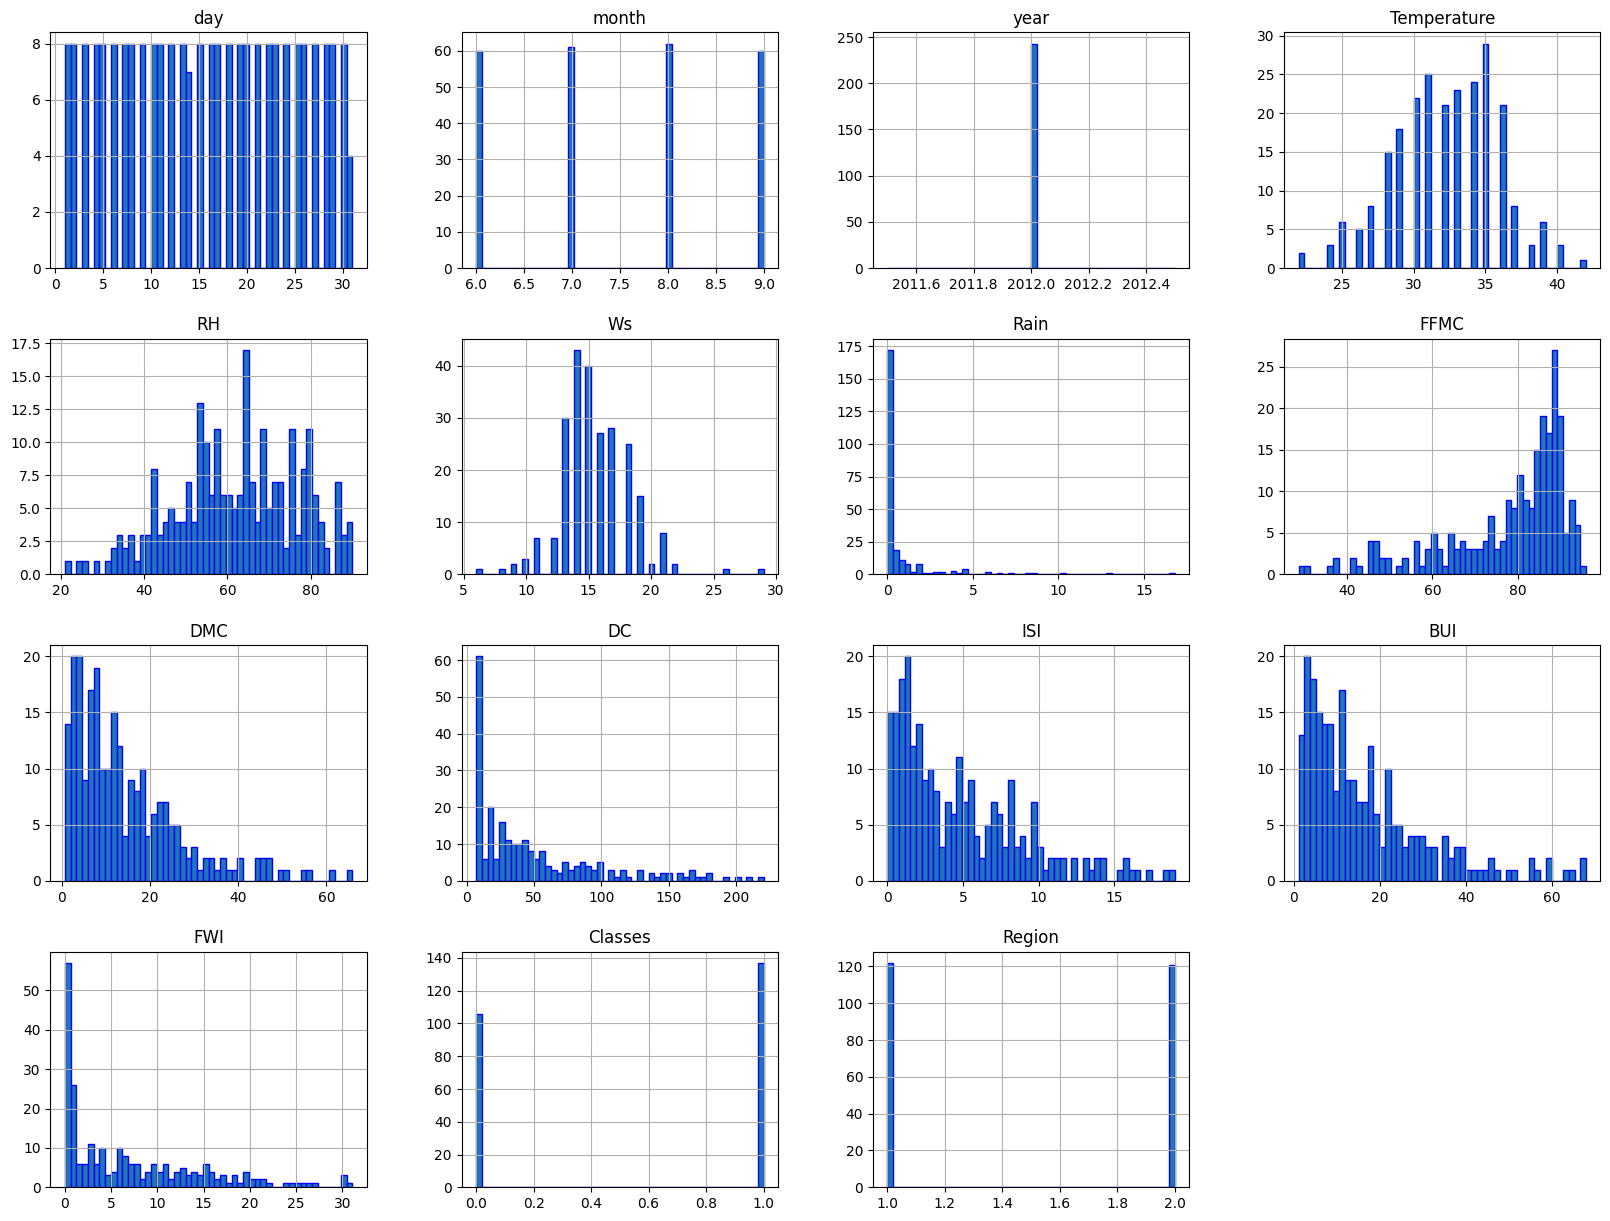

In [47]:
# PLot density plot for all features
#plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [48]:
# Percentage for PieChart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

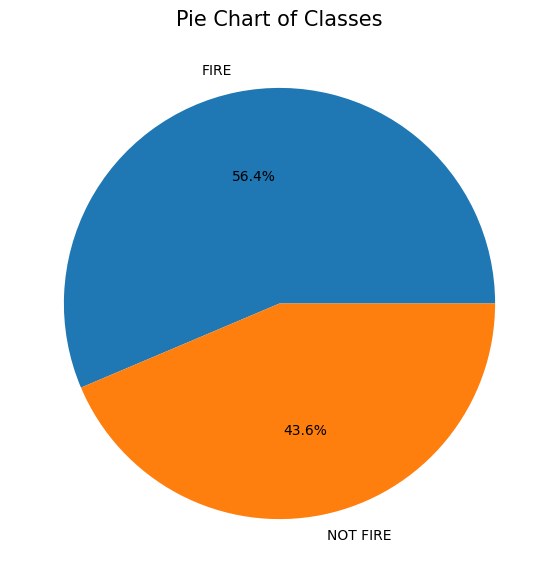

In [49]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

**Monthwise Fire Analysis**

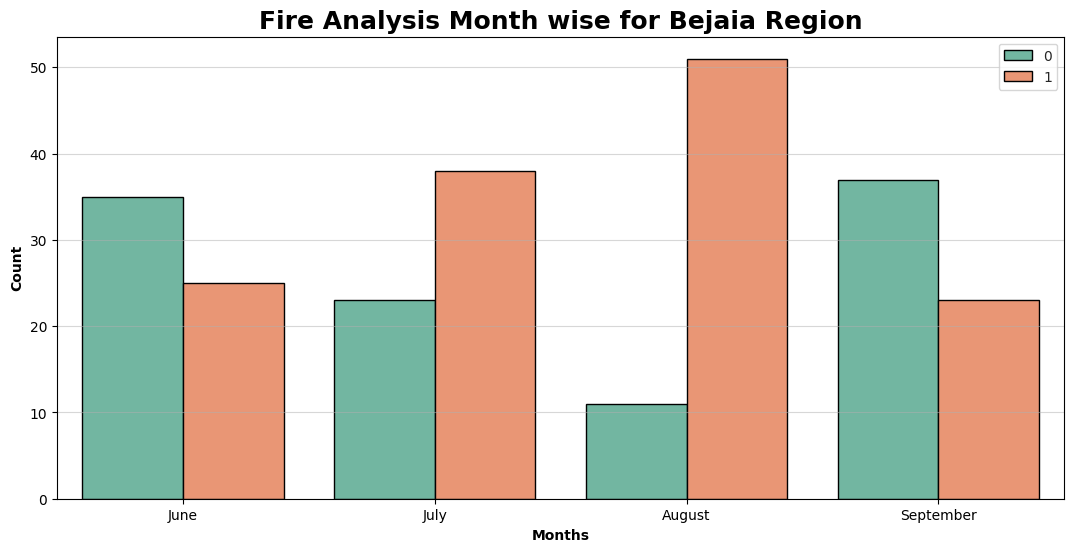

In [50]:
dftemp= df1.loc[df1['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

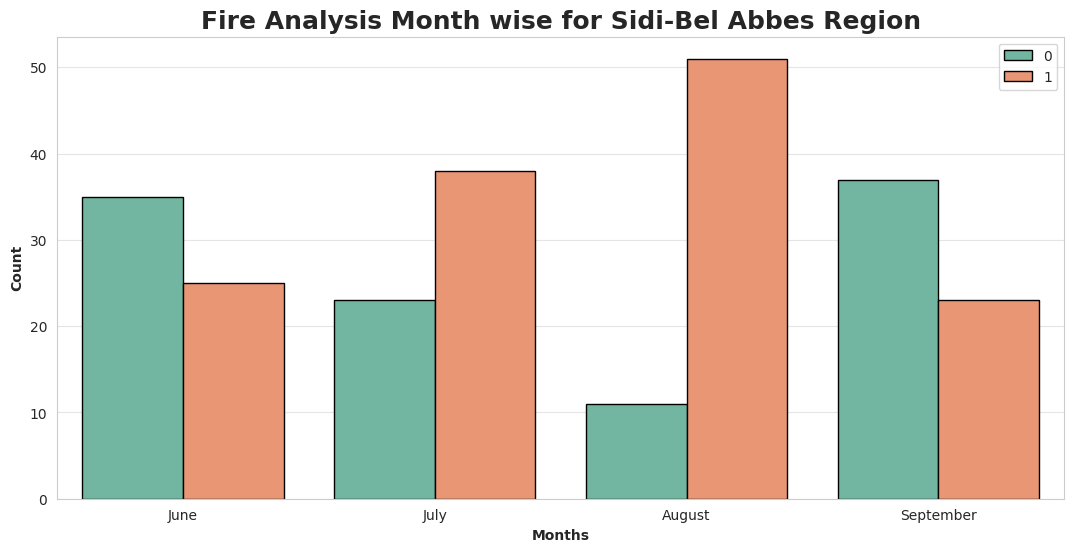

In [51]:
dftemp= df1.loc[df1['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

**Checking Multicollinearity**

- Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves.

- When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.

- Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [52]:
x = df1.iloc[:, 0:13]
y = df1['Classes']

In [53]:
x.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [54]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


## **Regression Anslysis**

In [56]:
#Droping features ['day','month','year'] beacuse it is not important for analysis
df2 = df1.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [57]:
X = df2.iloc[:,0:10]
y= df2['FWI']

In [58]:
x.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [59]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

**Spliting the dataset into train and test**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [61]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [62]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


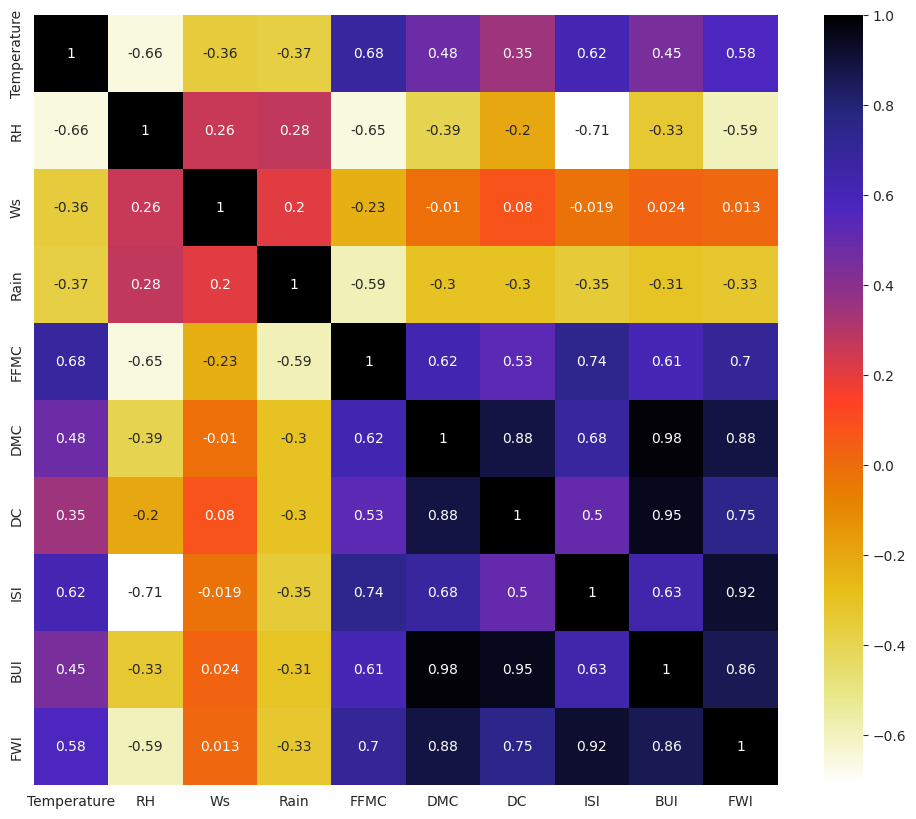

In [63]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Considering Correlation thresold value as 0.8.

# Check the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis.

In [64]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [65]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [66]:
#These three features are there which has correlation more than 0.8 so we will remove it
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 7), (61, 7))

# **Scalling**

In [67]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [68]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

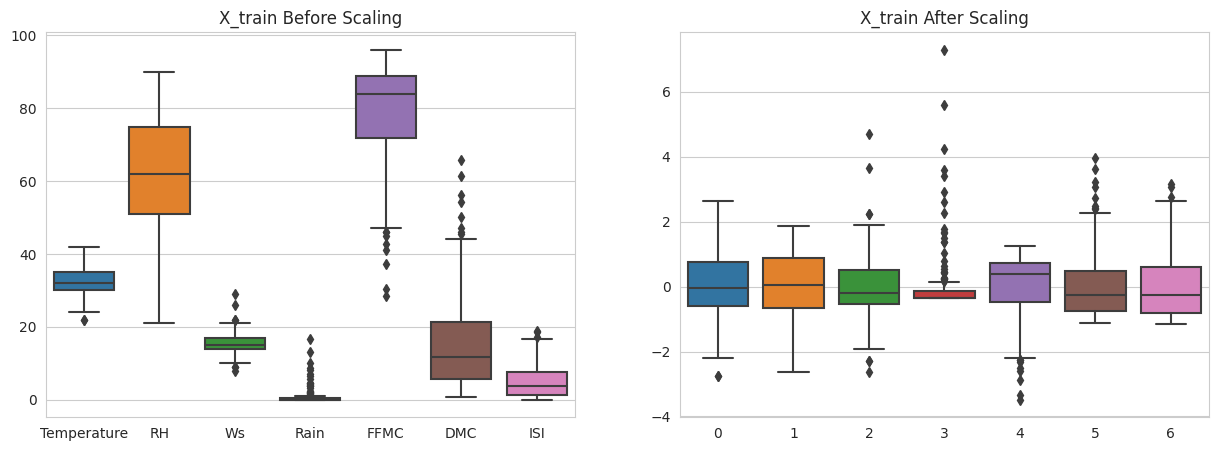

In [69]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## **Model Building For Regression Analysis**

**Linear Regression**

In [70]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
print('Intercept is :',Linear_Regression.intercept_)
print('Coefficient is :',Linear_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.0283721   0.04109337  0.09627506 -0.01655616 -0.54243749  3.84845037
  4.99255741]


In [72]:
print("Training Score:",Linear_Regression.score(X_train_scaled, y_train))
print("Test Score:",Linear_Regression.score(X_test_scaled,y_test))

Training Score: 0.9695395305921733
Test Score: 0.9649932926605853


In [73]:
Linear_Regression_predict = Linear_Regression.predict(X_test_scaled)
Linear_Regression_predict

array([ 9.41506683,  7.60634268,  7.68400501,  5.87306673,  7.3204071 ,
       11.34540494, -0.58473564,  9.31241843,  5.2947767 , 12.68860125,
        1.57139689, 13.2981353 ,  6.47490843, 15.26509949,  1.01152587,
        0.81120535,  2.27728471,  2.67422231,  3.83854169,  1.11119187,
       10.66495822,  5.58060473,  7.0466882 , -0.44199717,  2.3401461 ,
        3.44770367, 10.05834609,  0.34170617,  1.2083714 ,  1.86224714,
       13.40002748,  0.93449111, -0.67888196, 19.91564396,  3.89121169,
        0.90915613,  1.28882678, 18.86588672, 25.91576425,  2.47906687,
        6.97663212,  0.64561693, -0.86232546,  1.40590421,  0.37128199,
       -0.60182731,  3.94663026,  6.97440062, -0.70005406, 10.67146818,
        3.94007684, 10.12127919, -0.53012129,  1.44974711,  6.40213474,
        1.73573959, 11.15055467,  3.46597162,  3.61834924, 17.39712585,
        3.48274909])

In [74]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Linear_Regression_predict})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.415067
150,7.2,7.606343
37,8.0,7.684005
75,6.3,5.873067
109,7.7,7.320407
71,12.1,11.345405
122,0.2,-0.584736
73,10.2,9.312418
154,5.2,5.294777
234,13.7,12.688601


In [75]:
meanAbErr = metrics.mean_absolute_error(y_test, Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test, Linear_Regression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Linear_Regression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7123674928595757
Mean Square Error: 1.2152366305269502
Root Mean Square Error: 1.1023777168135023


In [76]:
# To find coefficient of determination
r2 =  r2_score(y_test, Linear_Regression_predict)
print("R-Square:",r2)

R-Square: 0.9649932926605853


**Lasso Regression**

In [77]:
from sklearn.linear_model import Lasso

Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train_scaled, y_train)

Lasso()

In [78]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [ 0.         -0.          0.         -0.          0.          3.14197888
  4.02820515]


In [79]:
print("Training Score:",Lasso_Regression.score(X_train_scaled, y_train))
print("Test Score:",Lasso_Regression.score(X_test_scaled,y_test))

Training Score: 0.9472315585164249
Test Score: 0.9376608745831527


In [81]:
Lasso_Regression_prediction = Lasso_Regression.predict(X_test_scaled)
Lasso_Regression_prediction

array([ 9.41205365,  7.99844254,  7.76713463,  6.42761844,  7.83424945,
       11.03474616,  0.37326534,  9.27417318,  5.89058614, 12.11675554,
        2.72767608, 12.55638802,  6.95133366, 14.13515689,  2.07735442,
        1.24093471,  3.10320145,  3.49365169,  4.72385091,  1.51841715,
       10.26716277,  6.14712828,  6.96067837,  0.42244758,  3.46938213,
        4.24233784,  9.83944744,  1.09703881,  1.31470808,  2.68483082,
       12.55370186,  1.49414759,  0.39087636, 17.96041947,  4.90661969,
        2.16540954,  2.41830086, 16.97516681, 22.97432223,  3.29295033,
        7.29260165,  1.57125023, -0.38573018,  2.6013912 ,  1.73340027,
       -0.37176998,  4.64610516,  7.30323258, -0.47711457, 10.22796835,
        4.88202857,  9.86532478, -0.37875008,  2.60504202,  6.64228   ,
        2.8087511 , 10.76789465,  4.44604691,  4.45302701, 15.93299497,
        4.35133325])

In [82]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Lasso_Regression_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.412054
150,7.2,7.998443
37,8.0,7.767135
75,6.3,6.427618
109,7.7,7.834249
71,12.1,11.034746
122,0.2,0.373265
73,10.2,9.274173
154,5.2,5.890586
234,13.7,12.116756


In [83]:
meanAbErr = metrics.mean_absolute_error(y_test, Lasso_Regression_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Lasso_Regression_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Lasso_Regression_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.1209175798372668
Mean Square Error: 2.164064960096106
Root Mean Square Error: 1.4710761231479852


In [84]:
# To find coefficient of determination
r2 =  r2_score(y_test, Lasso_Regression_prediction)
print("R-Square:",r2)

R-Square: 0.9376608745831527


**Ridge Regression**

In [85]:
from sklearn.linear_model import Ridge

Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train_scaled, y_train)

Ridge()

In [86]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.01703224  0.01276004  0.11637989 -0.00887201 -0.48703702  3.835665
  4.90903599]


In [87]:
print("Training Score:",Ridge_Regression.score(X_train_scaled, y_train))
print("Test Score:",Ridge_Regression.score(X_test_scaled,y_test))

Training Score: 0.9694958254406192
Test Score: 0.963974274483012


In [88]:
Ridge_Regression_Prediction = Ridge_Regression.predict(X_test_scaled)
Ridge_Regression_Prediction

array([ 9.39251437,  7.68144118,  7.70805477,  5.91731777,  7.32277987,
       11.32549417, -0.61428455,  9.32458568,  5.3543275 , 12.65635671,
        1.59706538, 13.29229684,  6.55184685, 15.24012346,  1.05044499,
        0.76331626,  2.32580614,  2.73309097,  3.85451177,  1.01624726,
       10.69077819,  5.61188478,  7.08055598, -0.46839731,  2.37491246,
        3.51229491, 10.06004893,  0.3232503 ,  1.17452817,  1.82454279,
       13.39453097,  0.93204516, -0.69595345, 19.86219019,  3.89928561,
        0.9678519 ,  1.36704477, 18.81971539, 25.84228555,  2.53914197,
        6.9916163 ,  0.70911278, -0.9547782 ,  1.47941379,  0.41456389,
       -0.73618821,  4.02724413,  6.96390552, -0.80439019, 10.71466028,
        3.96312558, 10.13018053, -0.58420548,  1.47875037,  6.39480936,
        1.77634234, 11.1494399 ,  3.56732834,  3.74032479, 17.37273034,
        3.48970483])

In [89]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Ridge_Regression_Prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.392514
150,7.2,7.681441
37,8.0,7.708055
75,6.3,5.917318
109,7.7,7.322780
71,12.1,11.325494
122,0.2,-0.614285
73,10.2,9.324586
154,5.2,5.354328
234,13.7,12.656357


In [90]:
meanAbErr = metrics.mean_absolute_error(y_test, Ridge_Regression_Prediction)
meanSqErr = metrics.mean_squared_error(y_test, Ridge_Regression_Prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Ridge_Regression_Prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7308753011423611
Mean Square Error: 1.250611229016129
Root Mean Square Error: 1.118307305268158


In [91]:
# To find coefficient of determination
r2 =  r2_score(y_test, Ridge_Regression_Prediction)
print("R-Square:",r2)

R-Square: 0.963974274483012


**Support Vector Regressor**

In [92]:
from sklearn.svm import SVR

Support_Vector_Regressor = SVR()
Support_Vector_Regressor.fit(X_train_scaled, y_train)

SVR()

In [93]:
print("Training Score:",Support_Vector_Regressor.score(X_train_scaled, y_train))
print("Test Score:",Support_Vector_Regressor.score(X_test_scaled,y_test))

Training Score: 0.8654280469866374
Test Score: 0.9346390408170823


In [94]:
Support_Vector_Regressor_prediction = Support_Vector_Regressor.predict(X_test_scaled)
Support_Vector_Regressor_prediction

array([ 9.04919795,  7.44998853,  7.86829281,  5.03177169,  7.07139761,
       11.48142099,  0.58197051,  9.8666704 ,  5.49748124, 12.77500309,
        1.80584425, 14.76040113,  6.26403927, 15.57852231,  0.30458029,
        0.0824374 ,  0.82294384,  2.54326347,  3.88870461,  1.07080613,
       10.41113927,  5.76422659,  5.41477393,  0.18058585,  2.63252129,
        3.54677155, 10.49808871, -0.19078061,  1.07923562,  4.11667669,
       13.56551436,  0.57275891,  0.45918287, 19.90339663,  3.99008023,
        0.95408843,  0.5626649 , 15.40358812, 18.75260209,  1.02819697,
        7.1660957 ,  1.62005104,  1.02137712,  1.66452929,  1.09087136,
        1.44307485,  3.9596869 ,  6.74097936,  1.31953891,  9.44317725,
        3.99491186, 10.85847028,  1.51584043,  2.17492734,  5.30440043,
        2.5080567 , 12.40467876,  2.8645062 ,  3.60909744, 18.76092814,
        3.4910059 ])

In [95]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Support_Vector_Regressor_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.049198
150,7.2,7.449989
37,8.0,7.868293
75,6.3,5.031772
109,7.7,7.071398
71,12.1,11.481421
122,0.2,0.581971
73,10.2,9.866670
154,5.2,5.497481
234,13.7,12.775003


In [96]:
meanAbErr = metrics.mean_absolute_error(y_test, Support_Vector_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.8914626084250336
Mean Square Error: 2.268966087993883
Root Mean Square Error: 1.5063087625031872


In [97]:
# To find coefficient of determination
r2 =  r2_score(y_test, Support_Vector_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9346390408170823


**Random Forest Regressor**

In [98]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [99]:
Random_Forest_Regressor_prediction = Random_Forest_Regressor.predict(X_test_scaled)
Random_Forest_Regressor_prediction

array([1.0183e+01, 7.6750e+00, 7.4960e+00, 4.5000e+00, 8.0670e+00,
       1.2323e+01, 2.2200e-01, 9.3710e+00, 5.8510e+00, 1.3040e+01,
       1.3980e+00, 1.3985e+01, 6.2030e+00, 1.5502e+01, 7.1300e-01,
       1.7100e-01, 1.1960e+00, 2.4180e+00, 5.3080e+00, 1.7700e-01,
       5.3810e+00, 5.9910e+00, 2.5010e+00, 2.0500e-01, 2.8430e+00,
       2.9540e+00, 1.0156e+01, 3.2700e-01, 1.2800e-01, 8.2000e-01,
       1.4871e+01, 4.0900e-01, 2.3300e-01, 2.2343e+01, 5.2870e+00,
       8.2600e-01, 8.7900e-01, 1.6165e+01, 2.7788e+01, 1.3060e+00,
       6.9070e+00, 8.6600e-01, 1.2400e-01, 2.1030e+00, 8.3400e-01,
       1.5000e-02, 3.3370e+00, 7.1760e+00, 2.4000e-02, 3.8660e+00,
       5.1350e+00, 1.0493e+01, 1.4000e-02, 2.5160e+00, 6.8680e+00,
       2.2640e+00, 1.2113e+01, 3.3270e+00, 3.3080e+00, 1.9986e+01,
       3.2290e+00])

In [100]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Regressor_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.183
150,7.2,7.675
37,8.0,7.496
75,6.3,4.500
109,7.7,8.067
71,12.1,12.323
122,0.2,0.222
73,10.2,9.371
154,5.2,5.851
234,13.7,13.040


In [101]:
meanAbErr = metrics.mean_absolute_error(y_test, Random_Forest_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.5664426229508192
Mean Square Error: 0.6764423770491815
Root Mean Square Error: 0.8224611705419178


In [102]:
# To find coefficient of determination
r2 =  r2_score(y_test, Random_Forest_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9805140663715258


**K-Neighbors Regressor**

In [103]:
from sklearn.neighbors import KNeighborsRegressor

K_Neighbors_Regressor = KNeighborsRegressor()
K_Neighbors_Regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [104]:
K_Neighbors_Regressor_prediction = K_Neighbors_Regressor.predict(X_test_scaled)
K_Neighbors_Regressor_prediction

array([ 7.48,  7.14,  8.82,  4.5 ,  7.22, 11.1 ,  0.4 , 10.54,  8.44,
       12.9 ,  1.68, 13.  ,  5.68, 16.28,  0.54,  0.26,  0.54,  0.7 ,
        4.84,  0.2 , 12.02,  7.16,  4.88,  0.3 ,  3.88,  4.58, 10.12,
        0.3 ,  0.3 ,  1.76, 16.26,  0.4 ,  0.36, 19.56,  5.54,  1.46,
        1.26, 18.1 , 28.3 ,  0.82,  7.56,  0.98,  0.08,  1.64,  1.88,
        0.06,  4.48,  7.14,  0.1 , 11.04,  5.36, 12.18,  0.12,  2.26,
        5.22,  2.34, 10.68,  3.1 ,  0.94, 15.82,  3.34])

In [105]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Regressor_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,7.48
150,7.2,7.14
37,8.0,8.82
75,6.3,4.50
109,7.7,7.22
71,12.1,11.10
122,0.2,0.40
73,10.2,10.54
154,5.2,8.44
234,13.7,12.90


In [106]:
meanAbErr = metrics.mean_absolute_error(y_test, K_Neighbors_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.917377049180328
Mean Square Error: 1.8540065573770488
Root Mean Square Error: 1.3616190940850708


In [107]:

# To find coefficient of determination
r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9465925702623768


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Regressor     | 97.98 % |
| Linear Regression  | 96.50 % |
| Ridge Regression  | 96.40 % |
| K Neighbors Regressor  | 94.65 %|
| Lasso Regression  | 93.77 % |
| Support Vector Regressor     | 93.47 % |

# **Hyperparameter Tuning**

**Tuning Random Forest Regressor**

In [108]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [109]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
bestrf_pred

array([10.66 ,  7.092,  8.03 ,  4.816,  9.   , 13.196,  0.29 ,  9.938,
        5.634, 14.118,  1.642, 14.38 ,  5.938, 15.58 ,  0.812,  0.218,
        1.506,  2.02 ,  5.202,  0.25 ,  6.988,  7.332,  3.764,  0.262,
        2.93 ,  3.114, 10.694,  0.436,  0.146,  1.318, 15.454,  0.442,
        0.346, 20.976,  5.166,  1.064,  1.024, 13.456, 27.408,  1.63 ,
        8.196,  0.86 ,  0.112,  2.206,  0.988,  0.028,  3.964,  7.366,
        0.438,  5.696,  5.464, 10.696,  0.1  ,  2.058,  6.498,  2.492,
       12.274,  3.66 ,  3.732, 18.908,  3.334])

In [110]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestrf_pred})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.660
150,7.2,7.092
37,8.0,8.030
75,6.3,4.816
109,7.7,9.000
71,12.1,13.196
122,0.2,0.290
73,10.2,9.938
154,5.2,5.634
234,13.7,14.118


In [111]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.6291475409836066
Mean Square Error: 0.7305516721311471
Root Mean Square Error: 0.8547231552562193
R-Square: 0.9465925702623768


# **Feature Selection**

- In feature selection will select only 5 important feature that will be important in order to make the prediction.

- I will drop the rest of features so we can build an interactive and user friendly web app.

In [112]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.327406
5,DMC,0.264082
4,FFMC,0.247414
3,Rain,0.073791
0,Temperature,0.038764
1,RH,0.034654
2,Ws,0.013890


- Here the 5 important feature are **ISI**, **FFMC**, **DMC**, **RH** and **Ws** that will used to make the prediction and will use for making front end application.

Text(0, 0.5, 'Features')

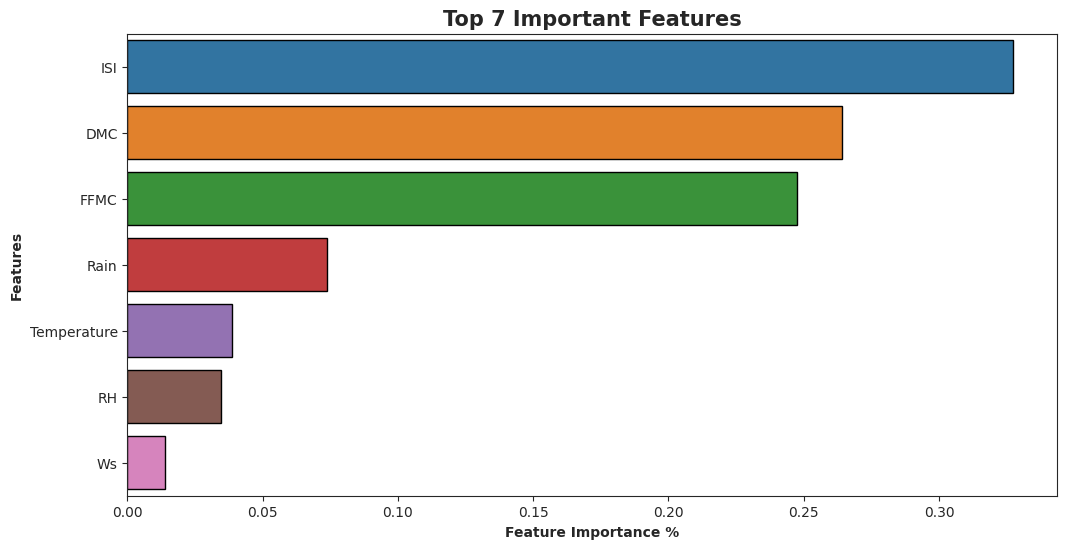

In [113]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

# **Model for deployment**

> Indented block



In [114]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [115]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [116]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [117]:
pip install scikit-learn==1.3.2

In [118]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [119]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
bestrf_pred

array([1.0356e+01, 8.2220e+00, 7.6440e+00, 4.9280e+00, 8.6100e+00,
       1.3160e+01, 2.7000e-01, 9.5360e+00, 5.4320e+00, 1.4220e+01,
       1.3380e+00, 1.5058e+01, 6.7080e+00, 1.6306e+01, 6.9000e-01,
       1.9000e-01, 1.6300e+00, 2.0560e+00, 4.6120e+00, 3.2000e-01,
       7.4600e+00, 5.6880e+00, 4.6640e+00, 2.4000e-01, 2.7600e+00,
       3.0980e+00, 1.0382e+01, 3.4000e-01, 1.6400e-01, 1.4560e+00,
       1.6284e+01, 4.0200e-01, 3.0000e-01, 2.0218e+01, 5.0860e+00,
       8.9600e-01, 8.7200e-01, 1.3574e+01, 2.7328e+01, 1.6900e+00,
       7.4840e+00, 5.9200e-01, 8.8000e-02, 2.0240e+00, 9.2000e-01,
       6.2000e-02, 3.6780e+00, 7.4180e+00, 2.6000e-02, 6.5440e+00,
       4.6320e+00, 1.1152e+01, 4.8000e-02, 2.4380e+00, 7.0460e+00,
       2.3860e+00, 1.1584e+01, 3.4200e+00, 3.5820e+00, 1.8420e+01,
       3.2560e+00])

In [120]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.5867540983606557
Mean Square Error: 0.6352540327868855
Root Mean Square Error: 0.7970282509339839
R-Square: 0.9465925702623768


In [121]:
import bz2,pickle
file = bz2.BZ2File('Regression_trial2.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()